<h1 style="color:#189AB4;font-size:80px;"><strong>Kaggle Survey <strong style="color:black">2021</strong></strong></h1>

<p style="font-size:120%">In the fifth year running this survey, Kaggle staffs are once again awed by the global, diverse, and dynamic nature of the data science and machine learning industry. This survey data EDA provides an overview of the industry on an aggregate scale, but it also leaves them wanting to know more about the many specific communities comprised within the survey. For that reason, they’re inviting the Kaggle community to dive deep into the survey datasets and help them tell the diverse stories of data scientists from around the world.</p>

<p style="font-size:120%"><strong>The challenge objective:</strong> tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. That group can be defined in the macro (for example: anyone who does most of their coding in Python) or the micro (for example: female data science students studying machine learning in masters programs). This is an opportunity to be creative and tell the story of a community you identify with or are passionate about!</p>

In [ ]:
# Importing the necessary modules (Hidden Input/Output)

import gc # For Memory Optimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Not sure if I used this
from wordcloud import WordCloud
from scipy.stats import norm

# Some more necessary libraries (These are for drawing the image on the bar charts)
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# To Avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Since there are many columns, I would like to view them all
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

<h1 style="color:#189AB4;font-size:60px;"><strong>Our</strong> <strong style="color:black">Data:</strong></h1>

In [ ]:
# Importing the dataset (Hidden Input)

df = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
df = df.iloc[1:,:] # The first row was describing the columns. Better to look at the description from the Metadata file provided
df.head(3).style.set_properties(**{"background-color": "#76c5d6","color": "black", "border-color": "black"})

In [ ]:
# Checking the number of rows and columns

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

<h1 style="color:#189AB4;font-size:60px;"><strong>User</strong> <strong style="color:black">Demographics:</strong></h1>

<h1 style="color:#189AB4"><strong>The First Question!</strong> What is your age?</h1>

In [ ]:
# Visualizing the Age among Kagglers. (Hidden Input)

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# Method for image
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8

# Creating a DataFrame to get the values and their counts (this was for my purpose)
# new_df = pd.DataFrame(df['Q1'].value_counts())

# I wanted to have the highest value in the middle, so i wrote the following two code lines
age_bucket = ['70+','55-59','45-49','35-39','22-24','25-29','18-21','30-34','40-44','50-54','60-69']   #new_df.index
age_bucket_cnt = [128,592,1375,2504,4694,4931,4901,3441,1890,964,553]   #list(new_df.Q1.values)

color = ['#E6E6E6', '#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6'] # Deciding the color
width = [0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8] # The Width
alpha = [0.3, 0.45, 0.5, 0.6, 0.75, 1.0, 0.75, 0.6, 0.5, 0.45, 0.3] # The Opacity

fontsize= [20, 20, 20, 20, 25, 35, 30, 20, 20, 20, 20]
x_num = [0,1,2,3,4,5,6,7,8,9,10]

for i in range(11):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Age Bucket of all Kagglers",x=5,y=5500,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# Placing the image
make_img(img_file,0.2, 5, 4700)    
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><strong>What did we find?</strong></h1>

<p style="font-size:120%">Here, we can clearly see that <strong>majority of Kagglers are <mark>between 21 to 29 years of age</mark></strong>.</p>
<p style="font-size:120%">Very few Kagglers are <strong>over the age of 50</strong>.</p>
<p style="font-size:120%">This is not very unexpected, as many students who like to explore Machine Learning(ML) or Data Science(DS) usually start off with Kaggle. But! we are not sure about this claim as of now. This is just a speculation. Let's explore further to find out, if this is really the case.</p>

<h1 style="color:#189AB4"><strong>Next Question,</strong> What is your gender?</h1>

In [ ]:
# Setting labels for items in Chart (Hidden Input)
Gender = ['Man', 'Woman', 'Others']
  
# Setting size in Chart based on 
# given values
Gender_cnt = [20598, 4890, 485]
  
# colors
colors = ['#E6E6E6', '#189AB4', '#FFFF00', 
          '#ADFF2F', '#FFA500']
# explosion
explode = (0.05, 0.05, 0.2)
  
    
plt.figure(figsize=[20,10])    
# Pie Chart
plt.pie(Gender_cnt, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode,)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(Gender, loc = "upper right",title="Genders", prop={'size': 15})
     
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    
# Adding Title of chart
plt.text(s="Gender Diversity in Kaggle",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
  
gc.collect()    
# Displaing Chart
plt.show()

<h1 style="color:#189AB4"><strong>What do we see here?</strong></h1>

<p style="font-size:120%"><mark>Kaggle community mostly comprises of <strong>Male ML Enthusiasts</strong></mark>. They consists of <strong>almost 80%</strong> of the people here on Kaggle.</p>
<p style="font-size:120%">There are also <strong>18% Female Kagglers</strong>. The ratio is not that bad, but it can be improved upon.</p>
<p style="font-size:120%">Finally, about <strong>2% are either Non-Bianary, Do not wish to disclose or Prefer to self explain</strong>.</p>

<h1 style="color:#189AB4"><strong>Where is everyone from?</strong></h1>

In [ ]:
# Importing the module Geopandas (Hidden Input) 
import geopandas as gpd

# List of countries we are interested in
lis_countries = ["Algeria","Argentina","Australia","Austria","Bangladesh","Belarus","Belgium","Brazil","Canada","Chile","China","Colombia",
                 "Czechia","Denmark","Ecuador","Egypt","Ethiopia","France","Germany","Ghana","Greece","India","Indonesia","Iraq","Ireland",
                 "Israel","Italy","Japan","Kazakhstan","Kenya","Malaysia","Mexico","Morocco","Nepal","Netherlands","Nigeria","Norway","Pakistan",
                 "Peru","Philippines","Poland","Portugal","Romania","Russia","Saudi Arabia","South Africa","South Korea","Spain","Sri Lanka",
                 "Sweden","Switzerland","Taiwan","Thailand","Tunisia","Turkey","Uganda","Ukraine","United Arab Emirates","United Kingdom",
                 "United States of America","Vietnam"]

# Reading the geopandas data 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_data = lis_countries # Passing the list of countries here
country_geo = list(world['name']) # The country list from the geopandas dataset

# List of all the values of population of Kagglers from each country
lis_pop = [44,182,264,51,317,51,65,751,331,102,814,225,63,48,50,482,43,401,470,99,102,7434,444,43,84,138,311,921,45,248,156,279,140,75,153,
           702,45,530,117,108,219,119,61,742,89,146,359,454,106,81,71,334,123,109,416,47,186,111,550,2650,277]

# Next we need to create a dataframe with lis_countries and lis_pop
our_country_analysis = pd.DataFrame(lis_countries, columns=['Country'])
our_country_analysis['KagglePopulation'] = lis_pop

# Next, we are going to visualize this...
mapped = world.set_index('name').join(our_country_analysis.set_index('Country')).reset_index()

to_be_mapped = 'KagglePopulation'
vmin, vmax = 0,10000
fig, ax = plt.subplots(1, figsize=(25,30))

mapped.dropna().plot(column=to_be_mapped, cmap='cividis', linewidth=0.8, ax=ax, edgecolors='1', alpha=0.7)

ax.text(s="Kagglers All Around the Globe",x=0,y=100,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='cividis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

gc.collect()
cbar = fig.colorbar(sm, orientation='vertical', shrink= .25)

<h1 style="color:#189AB4"><strong>A lot of Kagglers are from India!</strong></h1>

<p style="font-size:120%">The higher the saturation, the more the number of people from that country. Therefore, it is clearly visible that <mark>most of the Kagglers live in <strong>India, USA, Japan and China</strong></mark>.</p>
<p style="font-size:120%"><mark>Very less number of people can be found from- <strong>Kazakhstan, Norway, Algeria, Ehiopia and Iraq</strong>.</mark></p>
<p style="font-size:120%">This maybe due to the fact that people from that Demography, probably prefer some other profession rather than ML, AI, DataScience or Machine Learning.</p>
<p style="font-size:120%">Efforts can be made to introduce students and working professionals of those countries to the world of Data! This will encourage them to explore more datasets and ML problem statements. Who knows, maybe one day, these essential skills might help solve a serious problem in the country or even the whole wide world. Think big!</p>

<h1 style="color:#189AB4;font-size:60px;"><strong>User</strong> <strong style="color:black">Qualifications & Experience:</strong></h1>

<h1 style="color:#189AB4"><strong>Let's take a look at Kaggler's Highest Level of Formal Education...</strong></h1>

In [ ]:
# Visualizing the Formal Level of Education. (Hidden Input)

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# Method for image
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8

# Creating a DataFrame to get the values and their counts (this was for my purpose)
# new_df = pd.DataFrame(df['Q1'].value_counts())

# I wanted to have the highest value in the middle, so i wrote the following two code lines
age_bucket = ['Professional Doctorate','High School','Bachelor’s degree','Master’s degree','Doctoral degree','Others','No Answer']   #new_df.index
age_bucket_cnt = [360,417,9907,10132,2795,1735,627]   #list(new_df.Q1.values)

color = ['#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6'] # Deciding the color
width = [0.8, 0.8, 0.9, 0.9, 0.9, 0.8, 0.8,] # The Width
alpha = [0.5, 0.6, 0.75, 1.0, 0.75, 0.6, 0.5] # The Opacity

fontsize= [12, 16, 18, 21, 16, 16, 16]
x_num = [0,1,2,3,4,5,6]

for i in range(7):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Educational Qualifications of all Kagglers",x=3,y=11000,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# Placing the image
make_img(img_file,0.25, 3, 9500)      
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><strong>Very Qualified Professionals here</strong></h1>

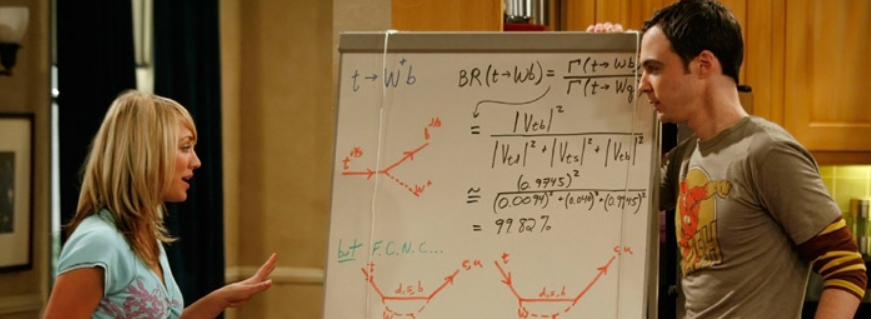

<p style="font-size:120%">Most of the Kagglers either hold a <strong>Master's degree or a Bachelor's degree</strong></p>
<p style="font-size:120%">Few people have <strong>a Professional Doctorate or No Formal education past High School.</strong></p>
<p style="font-size:120%">A decent amount of people have <strong>Doctoral Degree</strong>.</p>
<p style="font-size:120%">We have diversity in terms of qualifications, however, <mark>it is dominated by people holding a Bachelor's, Master's or Doctoral degrees.</mark></p>

<h1 style="color:#189AB4"><strong>A Quick Peek, at Professional Role/Job Titles of Kagglers</strong></h1>

In [ ]:
# Visualizing the Current Role (Hidden Input)

# Method for image
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# Creating a DataFrame to get the values and their counts (this was for my purpose)
# new_df = pd.DataFrame(df['Q1'].value_counts())

# I wanted to have the highest value in the middle, so i wrote the following two code lines
age_bucket = ['Developer\n Relations\n/Advocacy','Statistician','Data\n Engineer','Business\n Analyst','Research\n Scientist','Data\n Analyst','Software\n Engineer','Student',
              'Data\n Scientist','Other','Unemployed','ML\n Engineer','Project\n Manager','Product\n Manager','DB\n Engineer']   #new_df.index
age_bucket_cnt = [99,313,668,968,1538,2301,2449,6804,3414,2393,1986,1499,849,319,171]   #list(new_df.Q1.values)

color = ['#E6E6E6', '#189AB4', '#E6E6E6', '#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4','#E6E6E6','#189AB4', '#E6E6E6'] # Deciding the color
width = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] # The Width
alpha = [0.3, 0.45, 0.3, 0.45, 0.5, 0.6, 0.75, 1.0, 0.75, 0.6, 0.5, 0.45, 0.3, 0.3, 0.45] # The Opacity

fontsize= [12, 12, 14, 14, 14, 14, 18, 20, 16, 14, 12, 14, 14, 12, 12]
x_num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for i in range(15):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Current Role of all Kagglers",x=7.5,y=7500,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# Placing the image
make_img(img_file,0.15, 7, 6500)        
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><strong>I am Studying here...</strong></h1>

<p style="font-size:120%">Well, I'll be honest with you guys. I thought most of the Kagglers were gonna be Data Scientists or ML Enginneers, however, after this analysis, we can see that <mark>majority of the Kagglers are <strong>Students!</strong>. That is DOUBLE! the amount of <strong>Data Scientists</strong> we have here.</mark></p>
<p style="font-size:120%">Therefore, <strong>Students</strong>, followed by <strong>Data Scientists</strong>, <strong>Software Engineers</strong> and <strong>Data Analysts</strong> are pre-dominantly the main professions here on this platform.</p>
<p style="font-size:120%">There is also an interesting CATCH here! Notice how <strong>'Others'</strong> bar is pretty high? This goes to show that, ML, AI and working with Data is clearly attracting people from various different professions onto Kaggle! Now this is good news!</p>
<p style="font-size:120%">This is expected as we are moving into a whole new generation where we have loads of devices, sensors etc that generate BIG! data every second. <mark>With more and more availablility of data, it opens the ground to train various machine learning models and opens up a lot of opportunities to seek and explore.</mark> This has proved to be  very essential for people working in any domain!</p>

<h1 style="color:#189AB4"><strong>Okay, but for how long have they been programming?</strong></h1>

In [ ]:
# Visualizing the "For how long have you been programming" (Hidden Input)

years_bin = ['1-3years','<1years','3-5years','5-10years','10-20years','20+years','Never Coded']
years_cnt = [7874, 5881, 4061, 3099, 2166, 1860, 1032]

fig = plt.figure(figsize=(20,10))
plt.barh(width=years_cnt, y=years_bin, height=0.7, color = ['#189AB4', '#189AB4','#189AB4','#E6E6E6','#E6E6E6', '#E6E6E6', '#E6E6E6'], alpha=0.8)

##################### For the Years of Experience ###################################
s1 = ['1-3years','<1years','3-5years','5-10years','10-20years','20+years','Never Coded']
x1 = [8874, 6881, 5061, 4099, 3366, 2860, 2432]
y1 = [0,1,2,3,4,5,6]


for i in range(7):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)

plt.title("Average Years of Programming Experience of Kagglers",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
plt.show()

<h1 style="color:#189AB4"><strong>Let me just paste this one from StackOverflow...</strong></h1>

<p style="font-size:120%">Now this is what I was expecting atleast. If you see the graphs above, you will realise that <strong><i>"Our Kaggle Community is very young!"</i></strong> like <a href="https://www.kaggle.com/vivek468/what-s-up-kaggle-clean-eda/comments" style="text-decoration:none">Marília Prata</a> put it in her words.</p>
<p style="font-size:120%">Therefore, there are many Kagglers who's Experience in Programming is just <strong>1-3 years</strong>.</p>
<p style="font-size:120%">We see that, <mark>as the years of experience increases, the number of Kagglers in our community decreases.</mark></p>
<p style="font-size:120%">Kaggle is a great place for anyone willing to step into the World of Data. There is, or at-least I would say, that there are good proportion of skilled and novice Kagglers on the platform!</p>

<h1 style="color:#189AB4;font-size:60px;"><strong>User</strong> <strong style="color:black">Resource Preferences:</strong></h1>

In [ ]:
# Setting labels for items in Chart (Hidden Input)
Tool = ['Python', 'R']
  
# Setting size in Chart based on 
# given values
Tool_cnt = [21860, 5334]
  
# colors
colors = ['#E6E6E6', '#189AB4']

# explosion
explode = (0.05, 0.05)
  

plt.figure(figsize=[20,10])   

# Pie Chart
plt.pie(Tool_cnt, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode,)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(Tool, loc = "upper right",title="Programming Languages", prop={'size': 15})
     
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    
# Adding Title of chart
plt.text(s="Which Programming Tool do they Prefer?",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
  
gc.collect()    
# Displaing Chart
plt.show()

<h1 style="color:#189AB4"><strong>print("Python is better!")</strong></h1>

<p style="font-size:120%">This is not a surprise at all! From our previous analysis, we had concluded that <mark>most of the Kagglers are Students</mark>. They have <mark>barely started to code</mark>. Therefore, for beginners, Python is a very friendly coding language to pick up and learn.</p>
<p style="font-size:120%">Because of this, most of the newbies love to use Python. Not only that, <mark>Python has a large number of modules that make life easier for any developer, analyst etc!</mark></p>

![meme](https://i.pinimg.com/originals/a4/31/4a/a4314a37a2a0a1ce775d55b4c8b1383d.png)

<p style="font-size:120%"><strong>Python therefore, wins this battle against R</strong> on Kaggle by a large margin! <strong>Python:80% and R:20%</strong></p>

In [ ]:
# Fixing the values for 'Q8'
df['Q8'] = df['Q8'].apply(lambda x: 'Others' if x not in ['Python','R','SQL'] else x)
df['Q8'].value_counts()

# Setting labels for items in Chart (Hidden Input)
Tool = ['Python', 'R', 'SQL', 'Others']
  
# Setting size in Chart based on 
# given values
Tool_cnt = [20213, 1445, 1338, 2977]
  
# colors
colors = ['#E6E6E6', '#189AB4', '#FFFF00', '#ADFF2F']

# explosion
explode = (0.05, 0.05, 0.05, 0.05)
  

plt.figure(figsize=[20,10])   

# Pie Chart
plt.pie(Tool_cnt, colors=colors,
        autopct='%1.1f%%', pctdistance=1.2,
        explode=explode,)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

plt.legend(Tool, loc = "upper right",title="Programming Languages", prop={'size': 15})
     
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.rcParams['font.size'] = 25    
# Adding Title of chart
plt.text(s="What do they Recommend for Data Science?",x=0,y=1.3,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')
  
gc.collect()    
# Displaing Chart
plt.show()

<h1 style="color:#189AB4"><strong>It is widely used everywhere...</strong></h1>

<p style="font-size:120%">Though in a life of a Data Scientist, several programming languages like <strong>Java, C++, C</strong> etc are used, <mark>Python still holds a distinct place in most organizations across the globe</mark></p>
<p style="font-size:120%">Also, as per our previous analysis, we can clearly see that many Kagglers prefer Python over several other programming languages. Hence, we can safely conclude that <mark><strong>7/10 people</strong> will always recommend Python over any other programming languages.</mark></p>

In [ ]:
# Getting all the names and their values (Hidden Input)
name = ['JupyterLab','RStudio','Visual Studio','VS Code','PyCharm','Spyder','Notepad++','Sublime Text','Vim/Emacs','MATLAB','Jupyter Notebook','None','Other']
value = [5488,4771,4110,10040,7468,3794,3937,2839,1646,2203,16233,526,1491]

# Creating a dataframe to store this information
df_nine_ = pd.DataFrame(name, columns=['IDE'])
df_nine_['Values'] = value
df_nine_ = df_nine_.sort_values(by="Values", ascending=False)
df_nine_

fig = plt.figure(figsize=(20,10))
plt.barh(width=list(df_nine_['Values'].unique()), y=list(df_nine_['IDE'].unique()), height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6', '#E6E6E6'], alpha=0.8)

##################### For the Years of Experience ###################################
s1 = list(df_nine_['IDE'].unique())
x1 = [19833,12040,9468,7788,6471,6810,6437,5294,5539,4003,3946,2691,1726]
y1 = [0,1,2,3,4,5,6,7,8,9,10,11,12]


for i in range(13):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)


plt.title("Preferred IDE of Kagglers",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
gc.collect()
plt.show()

<h1 style="color:#189AB4"><strong>We like it SIMPLE!</strong></h1>

<p style="font-size:120%"><strong>Jupyter Notebook</strong> is very user friendly! We simply type the codes in the cell and press <strong>Shift+Enter</strong> to execute. Simple! And the result is also displayed just below.</p>
<p style="font-size:120%">Similar case for <strong>VS Code</strong> and <strong>PyCharm</strong>. They are very user friendly! Also, there are several plugins available to make the user experience even better! <mark>Therefore, Jupyter Notebook, PyCharm and VS Code are favourite among many developers.</mark></p>

In [ ]:
# Method for image
def make_img(img,zoom, x, y):
    img = mpimg.imread(img)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x,y),frameon=False)
    ax.add_artist(ab)

img_file = "https://www.freeiconspng.com/thumbs/crown-icon/queen-crown-icon-4.png"
zoom = 1
img_y= 4.8


# Visualizing the Hosted Notebooks. (Hidden Input)

fig, ax = plt.subplots(figsize=(25,10), facecolor="w")

# Creating a DataFrame to get the values and their counts (this was for my purpose)
# new_df = pd.DataFrame(df['Q1'].value_counts())

# I wanted to have the highest value in the middle, so i wrote the following two code lines
age_bucket = ['None','Colab Notebook','Kaggle Notebook']   #new_df.index
age_bucket_cnt = [7174,9792,9507]   #list(new_df.Q1.values)

color = ['#E6E6E6','#189AB4','#E6E6E6'] # Deciding the color
width = [0.9, 0.9, 0.9] # The Width
alpha = [0.55, 1.0, 0.75] # The Opacity

fontsize= [25, 45, 30]
x_num = [0,1,2]

for i in range(3):
    plt.bar(x=age_bucket[i],height=age_bucket_cnt[i], width=width[i], color=color[i], alpha=alpha[i])
    plt.text(s=age_bucket[i],x=x_num[i],y=age_bucket_cnt[i],va='bottom',ha='center',font='Comic Sans MS',fontsize=fontsize[i], alpha=alpha[i])
    plt.text(s="Preferred Hosted Notebooks",x=1,y=11000,font='Comic Sans MS', fontsize=50,va='bottom',ha='center',color='#189AB4')

# Placing the image
make_img(img_file,0.3, 1, 9000)    
    
gc.collect() # For Memory Optimization

plt.axis('off')
plt.show()

<h1 style="color:#189AB4"><a href="https://colab.research.google.com/" style="text-decoration:none;color:#189AB4"><strong>https://colab.research.google.com/</strong></a></h1>

<p style="font-size:120%">Google colab just barely edges out Kaggle Hosted Notebook services. Just like the Kaggle hosted interface, it is simple to use and has <strong>no limits on the GPU usage</strong>. Maybe that is one of the reason why people prefer this? Or is it because, <strong>users can directly get their datasets from the google drive?</strong> The fact that <strong>we can connect to our local runtime?</strong> Who knows.</p>
<p style="font-size:120%">Whatever might be the case, it is worth to notice that a decent number of people still prefer to run their codes on their local machine. Probably, <mark>in my opinion if Kaggle Kernels can be made more user friendly and provide more features similar to that of Google colab, it might turn out to be a popular choice by next year!</mark></p>

In [ ]:
# Fixing the column data before making a Word Cloud (Hidden Input)
df['Q11']=df['Q11'].map({"A laptop":"Laptop","A personal computer / desktop":"Personal Computer",
                         "A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)":"Cloud Platform",
                         "A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)":"DeepLearning Workstation","None":"None","Other":"Other"})
df['Q11']=df['Q11'].astype(str)

df['Q11'].value_counts()

# Word Cloud inspired by Girish Kumar Sahoo's notebook : https://www.kaggle.com/girishkumarsahu/learnplatform-covid-19-impact

# get unique Name
name= df['Q11'].unique()

# convert numpy array to string
name_str = ",".join(name)

# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=False).generate(name_str)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

<h1 style="color:#189AB4"><strong>I spy... A nimbus in the sky!</strong></h1>

<p style="font-size:120%">From the word cloud, it is evident that most Kagglers like to use their own <strong>Laptop</strong>, followed by <strong>Cloud Platform</strong> and <strong>Personal Computer</strong>.</p>
<p style="font-size:120%">Remember, that from our previous analysis, we saw how <mark>most of the individuals on Kaggle are Students?</mark> They might not have the money for fancy Deep Learning Platforms and cool gadgets like that. Hence, a <strong>Laptop is a very popular choice</strong>.</p>
<p style="font-size:120%">Another thing noticing here is that, the next best choice are the cloud computing platforms. <mark>Usually this is the case for people who's Laptops or Personal Computers are not compatible enough to run Machine Learning libraries.</mark></p>

<h1 style="color:#189AB4;font-size:60px;"><strong>A Kaggler's</strong> <strong style="color:black">Secret Ingredient:</strong></h1>

<p style="font-size:120%">Kaggle provides free access to <strong>NVIDIA TESLA P100 GPUs.</strong> <mark>These GPUs are useful for training deep learning models</mark>, though they do not accelerate most other workflows (i.e. <mark>libraries like pandas and scikit-learn do not benefit from access to GPUs</mark>).</p>

<p style="font-size:120%">You can use up to a quota limit per week of GPU. The quota resets weekly and is <strong>30 hours or sometimes higher depending on demand and resources</strong></p>

<p style="font-size:120%">Read more about GPUs <a href="https://www.kaggle.com/docs/efficient-gpu-usage" style="text-decoration:none">here.</a></p>

In [ ]:
# Getting the values and their counts (Hidden Input)
name = ["None","NVIDIA GPUs","Google Cloud TPUs","Other","AWS Inferentia Chips","AWS Trainium Chips"]
count = [13234,8036,3451,867,416,414]

# Visualizing using a barh:
fig = plt.figure(figsize=(20,10))
plt.barh(width=count, y=name, height=0.7, color = ['#E6E6E6', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the Years of Experience ###################################
s1 = name
x1 = [14234,10236,6651,2067,3916,3714]
y1 = [0,1,2,3,4,5]


for i in range(6):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)

plt.title("Specialized Hardware",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
gc.collect()
plt.show()

<h1 style="color:#189AB4"><strong>Dad... I need an Nvdia RTX 3090Ti for School👉👈</strong></h1>

<p style="font-size:120%">Ofcourse I need a 3090Ti for studies. Kidding. <strong>Nvdia GPUs</strong> are preferred by many for <mark>it's ability to process ML models and especially DL models faster!</mark></p>
<p style="font-size:120%">That is followed by <strong>Google Cloud TPUs</strong> <mark>due to it's easy availability.</mark></p>
<p style="font-size:120%">Also, if you notice, there are many Kagglers that do not use any specialized Hardware. Now there is a reason for that. <mark>Not everyone knows Deep Learning and Scikit Learn does not support GPUs.</mark> Therefore, for most Kagglers, they do not require any hardware as such to increase their computing power!</p>
<p style="font-size:120%">Now this is not the case for people using TPUs and GPUs. As of now, I am speculating <mark>these <strong>Kagglers participate in Competitions a lot!</strong> And performing large number of cross-validations/training on several models takes <strong>a lot of time and effort</strong> if there is no GPUs or TPUs.</mark></p>

<h1 style="color:#189AB4"><strong>Let's look at Kaggler's TPU usage next: </strong></h1>

<p style="font-size:120%"><strong>TPUs</strong> are now available on Kaggle, for free. <mark>TPUs are hardware accelerators specialized in deep learning tasks.</mark> They are supported in Tensorflow 2.1 both through the Keras high-level API and, at a lower level, in models using a custom training loop.</p>

<p style="font-size:120%">You can use <strong>up to 30 hours per week</strong> of TPUs and <strong>up to 9h at a time in a single session.</strong></p>

<p style="font-size:120%">Read more about TPUs <a href="https://www.kaggle.com/docs/tpu" style="text-decoration:none">here.</a></p>

In [ ]:
# Visualizing using a barh: (Hidden Input)
name = ['Never','2-5 times','Once','6-25 times','More than 25 times']
count = list(df['Q13'].value_counts())

fig = plt.figure(figsize=(20,10))
plt.barh(width=count, y=name, height=0.7, color = ['#E6E6E6', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the TPU ###################################
s1 = name
x1 = [17734,5436,4151,3167,4516]
y1 = [0,1,2,3,4]


for i in range(5):
    plt.text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=25,va='center',ha='right',alpha=0.8)

plt.title("TPU Usage of Kagglers",font='Comic Sans MS', fontsize=42, pad=20, color='#189AB4')
plt.axis('off')
plt.gca().invert_yaxis()
gc.collect()
plt.show()

<h1 style="color:#189AB4"><strong>∞ Power </strong></h1>

<p style="font-size:120%"><strong>TPUs</strong> are now available on Kaggle and are <mark>mainly used during Competitions or for other Deep Learning and Computer Vision purposes.</mark></p>
<p style="font-size:120%">The reason why most people do not use TPUs remains almost the same as why people do not use GPUs</p>
<p style="font-size:120%">Mostly Kagglers tend to use it <strong>2-5 times a week</strong> or maybe <strong>once in a while.</strong></p>

<h1 style="color:#189AB4;font-size:60px;"><strong>Tools</strong> <strong style="color:black">of Trade:</strong></h1>

<p style="text-align:center; font-size:150%"><strong><i> “Through all of your snares, Blade Fury cuts like silk.” </i>– Juggernaut (DOTA 2) </strong></p>

<p style="font-size:120%">The above quote is one of my favourite quotes from the online MOBA game Defense of The Ancients a.k.a DOTA 2. The reason why I put this quote here is because, the data that we get most of the time are unexplored with many small traps! If we understand a data incorrectly or interpret it differently, it may lead us astray. Hence, these are similar to snares in this case. Blade Fury are the tools that we have at our disposal to cut through these snares!</p>

<p style="font-size:120%">Come, let's find out, the popular tools used by every Kaggler.</p>

In [ ]:
# Creating subplots this time: (Hidden Input)
fig, axis = plt.subplots(6, 1, figsize=(20, 50))

# Declaring all the values and their counts:
# For Q14:
name14 = ['Matplotlib','Seaborn','Plotly','GGplot','None','Shiny','Geoplotlib','Bokeh','D3 js','Other','Folium','Altair',]
val14 = [17595,12586,5778,5100,3479,1322,1148,1050,978,776,716,309]

# For Q15:
name15 = ['<1 year','1-2 years','No ML usage','2-3 years','3-4 years','5-10 years','4-5 years','10-20 years','20+ years']
val15 = [9163,4675,3889,2305,1171,1033,945,362,211]

# For Q16:
name16 = ['Scikit-Learn','TensorFlow','Keras','PyTorch','XGBoost','LightGBM','None','CatBoost','Higgingface','Pytorch Lightning','Caret',
          'Fast.ai','Prophet','Tidymodels','H20 3','Other','MXNet','JAX']
val16 = [13987,9371,7975,6088,5974,2635,1916,1512,1122,1060,1009,824,800,678,488,439,252,190]

# For Q17:
name17 = ['Linear Models','Tree Models','CNN','Dense Neural Net','Bayesian Approch','RNN','Transformer Networks','None','GAN','Evolutionary Approaches']
val17 = [13952,11863,7410,4468,4392,4228,2273,1470,1353,963]

# For Q18:
name18 = ['VGG/Inception/ResNet','Image Segmentation Method','Object Detection Method','General Purpose Img/Vid Tools','GAN','None','Other']
val18 = [4373,2740,2716,2662,1492,1439,119]

# For Q19:
name19 = ['Word Embeddings/Vectors','Transformer Lang Tools','Encoder-Decoder Models','None','Contextualized Embeddings']
val19 = [2643,2351,2023,1331,748]

##### Visualization Begins Here #####

# Visualizing using a barh Q14:

axis[0].barh(width=val14, y=name14, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6'
                                                    ,'#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the Visualization Tool ###################################
s1 = name14
x1 = [18695,13586,6578,6000,4279,2122,2248,1850,1578,1376,1416,909]
y1 = [0,1,2,3,4,5,6,7,8,9,10,11]


for i in range(12):
    axis[0].text(s = s1[i], x=x1[i], y=y1[i] ,font = 'Comic Sans MS', fontsize=12,va='center',ha='right',alpha=0.8)

axis[0].title.set_text("Favourite Visualization Module")
axis[0].title.set_color("#189AB4")
axis[0].axis('off')
axis[0].invert_yaxis()
gc.collect()

#################################################################################################################################
# Visualizing using a barh Q15:

axis[1].barh(width=val15, y=name15, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6'
                                                    ,'#E6E6E6'], alpha=0.8)

##################### For the ML Experience ###################################
s2 = name15
x2 = [9663,5275,4689,2905,1771,1633,1490,1062,811]
y2 = [0,1,2,3,4,5,6,7,8]


for i in range(9):
    axis[1].text(s = s2[i], x=x2[i], y=y2[i] ,font = 'Comic Sans MS', fontsize=12,va='center',ha='right',alpha=0.8)


axis[1].title.set_text("Machine Learning Usage")
axis[1].title.set_color("#189AB4")
axis[1].axis('off')
axis[1].invert_yaxis()
gc.collect()
#################################################################################################################################
# Visualizing using a barh Q16:

axis[2].barh(width=val16, y=name16, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6'
                                                    ,'#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6'
                                                        ,'#E6E6E6','#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the Fav SKLearn Tool ###################################
s3 = name16
x3 = [14987,10271,8475,6788,6674,3435,2416,2312,2122,2480,1509,1424,1450,1648,988,939,852,490]
y3 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]


for i in range(18):
    axis[2].text(s = s3[i], x=x3[i], y=y3[i] ,font = 'Comic Sans MS', fontsize=12,va='center',ha='right',alpha=0.8)


axis[2].title.set_text("Popular ML Frameworks")
axis[2].title.set_color("#189AB4")
axis[2].axis('off')
axis[2].invert_yaxis()
gc.collect()
#################################################################################################################################
# Visualizing using a barh Q17:

axis[3].barh(width=val17, y=name17, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6'
                                                    ,'#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the ML Algorithms ###################################
s3 = name17
x3 = [15152,12863,7810,5868,5902,4628,4073,1970,1753,2963]
y3 = [0,1,2,3,4,5,6,7,8,9]


for i in range(10):
    axis[3].text(s = s3[i], x=x3[i], y=y3[i] ,font = 'Comic Sans MS', fontsize=12,va='center',ha='right',alpha=0.8)


axis[3].title.set_text("Most Popular ML Algorithms")
axis[3].title.set_color("#189AB4")
axis[3].axis('off')
axis[3].invert_yaxis()
gc.collect()
#################################################################################################################################
# Visualizing using a barh Q18:

axis[4].barh(width=val18, y=name18, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6','#E6E6E6','#E6E6E6','#E6E6E6'], alpha=0.8)

##################### For the Computer Vision ###################################
s4 = name18
x4 = [4973,3490,3346,3450,1632,1579,269]
y4 = [0,1,2,3,4,5,6]


for i in range(7):
    axis[4].text(s = s4[i], x=x4[i], y=y4[i] ,font = 'Comic Sans MS', fontsize=12,va='center',ha='right',alpha=0.8)


axis[4].title.set_text("Popular Computer Vision Tools")
axis[4].title.set_color("#189AB4")
axis[4].axis('off')
axis[4].invert_yaxis()
gc.collect()
#################################################################################################################################
# Visualizing using a barh Q19:

axis[5].barh(width=val19, y=name19, height=0.7, color = ['#189AB4', '#189AB4', '#189AB4', '#E6E6E6', '#E6E6E6'], alpha=0.8)

##################### For the NLP Methods ###################################
s5 = name19
x5 = [3043,2721,2423,1431,1188]
y5 = [0,1,2,3,4]


for i in range(5):
    axis[5].text(s = s5[i], x=x5[i], y=y5[i] ,font = 'Comic Sans MS', fontsize=12,va='center',ha='right',alpha=0.8)


axis[5].title.set_text("Popular NLP Methods")
axis[5].title.set_color("#189AB4")
axis[5].axis('off')
axis[5].invert_yaxis()
gc.collect()

plt.show()

<h1 style="color:#189AB4"><strong>Everyone's Favourite </strong></h1>

<p style="font-size:120%"><strong>Matplotlib, Seaborn and Plotly</strong> continues to be the popular choice among many Kagglers followed by <strong>GGPlot</strong> for R users. Especially because they are so easy to implement. We can also see that there are other libraries like <strong>Geoplotlib, Bokeh and Folium</strong> trending these days on kaggle.</p>
<p style="font-size:120%">Moving onto the Machine Learning usage of Kagglers, we notice the correlation again that since there are more number of Students on this platform, we have more number of kagglers who's ML experiece ranges from <strong>less than 1 year to 3 years.</strong> Another interesting thing to notice here is that a lot of people here on Kaggle do not use Machine Learning. They work on <mark>Data Analysis or Descriptive Statistical Analysis, but are not actively involved with Predictive Analystics.</mark></p>
<p style="font-size:120%"><strong>SkLearn</strong> continues to be the top ML framework used by many Kagglers followed by <strong>Tensor-flow and Keras.</strong> It is also worth noticing that <strong>Pytorch, XGBoost, LightGBM and CatBoost</strong> also have decent popularity among Kagglers. On the other hand, <strong>JAX, MXNET and H2O 3</strong> continue to be at the bottom of the list.</p>
<p style="font-size:120%">Moving onto the popular ML Algorithms, we can clearly see that <strong>Linear Models, Tree Models and CNN</strong> are the most widely preferred Algorithms here on Kaggle. This is followed by <strong>Dense Neural Net, RNN and Bayesian Approaches.</strong> Now this is expected since <mark>most of the population of Kagglers are students and they start usually by learning about Linear and Tree models.</mark></p>
<p style="font-size:120%"><strong>Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc), Image segmentation methods (U-Net, Mask R-CNN, etc) and Object detection methods (YOLOv3, RetinaNet, etc)</strong> are the most popular Computer Vision Modules used by Kagglers here. Now this is not used by many Kagglers. These are only used by a little proportion of people.</p>
<p style="font-size:120%">NLP methods are also used by a certain part of the population. Not everyone uses this. But for those that do - <strong>Word embeddings/vectors (GLoVe, fastText, word2vec), Transformer language models (GPT-3, BERT, XLnet, etc) and Encoder-decoder models (seq2seq, vanilla transformers)</strong> are the most popular among them.</p>

<h1 style="color:#189AB4;font-size:60px;"><strong>Where</strong> <strong style="color:black">We Work:</strong></h1>

<img src="https://imgur.com/Kdp1Hak.gif" style="width:80%"></img>

In [ ]:
# Command to install circlify (Hidden Input/Output)
!pip install circlify

In [ ]:
# import the circlify library (Hidden Input)
import circlify

Q20 = df['Q20'].value_counts().tolist()


Q20_labels = ['Hospitality/\nEntertainment/\nSports','Military/\nSecurity/\nDefense','Online Business/\nInternet-based\n Sales','Non-profit/Service','Shipping/\nTransportation','Broadcasting/\nCommunications',
'Marketing/CRM','Insurance/\nRisk Assessment','Retail/Sales','Energy/Mining','Online Service/\nInternet-based\n Services','Government/Public Service','Medical/Pharmaceutical',
'Manufacturing/Fabrication','Other','Accounting/Finance','Academics/Education','Computers/Technology']

# compute circle positions:
circles = circlify.circlify(
    Q20, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=4)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(30,30))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = Q20_labels

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    if label in ['Computers/Technology','Academics/Education','Accounting/Finance']:
        ax.add_patch(plt.Circle((x, y), r*0.95, alpha=0.6, facecolor="#189AB4", edgecolor="#189AB4"))
        plt.annotate(label, (x,y ) ,va='center', ha='center',  fontsize=30)
    else:
        ax.add_patch(plt.Circle((x, y), r*0.95, alpha=0.5, facecolor='#E6E6E6', edgecolor='#E6E6E6'))
        plt.annotate(label, (x,y ) ,va='center', ha='center',  fontsize=15)

plt.title("Type of Industry",font='Comic Sans MS', fontsize=80, color='#189AB4')
plt.show()

<h1 style="color:#189AB4"><strong>Understanding Industry Requirement </strong></h1>

<p style="font-size:120%">Since the occupation of the Kagglers are also an indicator of which Industry is demanding more of ML and AI, it is easy to co-relate both and say conclude that <strong>Computer & Technology, Academics & Education and Accounting & Finance</strong> benefit the most! then any other industries out there.</p>
<p style="font-size:120%">The above Industries are followed by the <strong>Pharmaceutical, Energy and Manufacturing Industries.</strong> These are the new emerging sectors which are employing Machine Learning in their production activities.</p>
<p style="font-size:120%">As more and more data is available to us humans, <mark>there will always be a possibility to understand these data to drive better business decision and improve the quality of life for people all over the world</mark>.</p>

<h1 style="color:#189AB4;text-align:center"><strong>Work in Progress 👷‍♂️ </strong></h1>
<h2 style="color:#189AB4;text-align:center"><strong>Drop an Upvote if you like/fork. Thanks for Reading. </strong></h2>
<h2 style="color:#189AB4;text-align:center"><strong>Do read my other notebooks </strong></h2>